### Importing necessary libraries


In [1]:
import numpy as np
import pandas as pd
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


In [2]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [3]:
from google.colab import files
upload=files.upload()

Saving datasets_6660_9643_Restaurant_Reviews.tsv to datasets_6660_9643_Restaurant_Reviews.tsv


In [4]:
df=pd.read_csv('datasets_6660_9643_Restaurant_Reviews.tsv', delimiter='\t')

In [5]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [7]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

### Data Cleaning

In [8]:
def clean_data(text):
  text=text.lower()
  text=text.strip()
  token=RegexpTokenizer(r'\w+')
  text = token.tokenize(text)
  text= " ".join(text)
  tokens= word_tokenize(text)
  stops=set(stopwords.words('english'))
  text=[word for word in tokens if word not in stops]
  lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()
  text=[lemmatizer.lemmatize(word) for word in tokens]
  text=' '.join(text)
  return text


In [9]:
# Sample text, source - Wikipedia

text= """
Thor: Love and Thunder is a 2022 American superhero film based on Marvel Comics featuring the character Thor, 
produced by Marvel Studios and distributed by Walt Disney Studios Motion Pictures. 
It is the sequel to Thor: Ragnarok (2017) and the 29th film in the Marvel Cinematic Universe (MCU). 
The film is directed by Taika Waititi, who co-wrote the script with Jennifer Kaytin Robinson, 
and stars Chris Hemsworth as Thor alongside Christian Bale, Tessa Thompson, Jaimie Alexander, 
Waititi, Russell Crowe, and Natalie Portman. In the film, Thor attempts to find inner peace, 
but must return to action and recruit Valkyrie (Thompson), Korg (Waititi), and Jane Foster 
(Portman)—who is now the Mighty Thor—to stop Gorr the God Butcher (Bale) from eliminating all gods.
"""


In [10]:
val2=clean_data(text)
val2

'thor love and thunder is a 2022 american superhero film based on marvel comic featuring the character thor produced by marvel studio and distributed by walt disney studio motion picture it is the sequel to thor ragnarok 2017 and the 29th film in the marvel cinematic universe mcu the film is directed by taika waititi who co wrote the script with jennifer kaytin robinson and star chris hemsworth a thor alongside christian bale tessa thompson jaimie alexander waititi russell crowe and natalie portman in the film thor attempt to find inner peace but must return to action and recruit valkyrie thompson korg waititi and jane foster portman who is now the mighty thor to stop gorr the god butcher bale from eliminating all god'

In [11]:
X=df['Review']
y=df['Liked']

### Train- Test Split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [13]:
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)


(800,) (800,)
(200,) (200,)


In [14]:
X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)



In [15]:
X_train

0      It is PERFECT for a sit-down family meal or ge...
1                    Service was slow and not attentive.
2      The food was outstanding and the prices were v...
3      I had about two bites and refused to eat anymore.
4                       If you haven't gone here GO NOW!
                             ...                        
795                            Will never, ever go back.
796    Lastly, the mozzarella sticks, they were the b...
797             The restaurant atmosphere was exquisite.
798       not even a "hello, we will be right with you."
799    These are the nicest restaurant owners I've ev...
Name: Review, Length: 800, dtype: object

In [16]:
clean_X_train=X_train.apply(clean_data)

In [17]:
clean_X_train

0      it is perfect for a sit down family meal or ge...
1                      service wa slow and not attentive
2      the food wa outstanding and the price were ver...
3        i had about two bite and refused to eat anymore
4                        if you haven t gone here go now
                             ...                        
795                              will never ever go back
796    lastly the mozzarella stick they were the best...
797               the restaurant atmosphere wa exquisite
798           not even a hello we will be right with you
799    these are the nicest restaurant owner i ve eve...
Name: Review, Length: 800, dtype: object

In [18]:
clean_X_test=X_test.apply(clean_data)

In [19]:
clean_X_test

0                              awesome selection of beer
1      not much flavor to them and very poorly constr...
2      worse of all he humiliated his worker right in...
3        host staff were for lack of a better word bitch
4                                      great brunch spot
                             ...                        
195         they also have the best cheese crisp in town
196    that s right the red velvet cake ohhh this stu...
197                           we will not be coming back
198                                 bacon is hella salty
199    the food wa very good and i enjoyed every mout...
Name: Review, Length: 200, dtype: object

In [20]:
vectorizer= TfidfVectorizer()
X_train_clean=vectorizer.fit_transform(clean_X_train)
X_test_clean=vectorizer.transform(clean_X_test)

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [22]:
model=MultinomialNB()

### Hyperparameter Tuning of Multinomial Naive Bayes Model


In [23]:
alpha_values={'alpha': [10**-2, 10**-1, 1, 10**1, 10**2]}
grid_1=GridSearchCV(model,param_grid=alpha_values,cv=5, scoring='accuracy',return_train_score=True)
grid_1.fit(X_train_clean,y_train)
print(grid_1.best_params_)

{'alpha': 1}


In [24]:
alpha=[10**-2, 10**-1, 1, 10**1, 10**2]
train_acc=grid_1.cv_results_['mean_train_score']
val_acc=grid_1.cv_results_['mean_test_score']

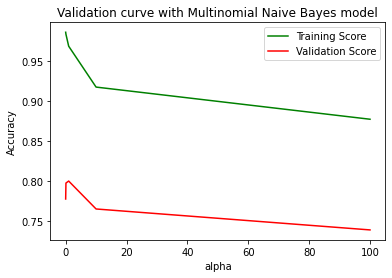

In [25]:
import matplotlib.pyplot as plt

plt.plot(alpha,train_acc, label='Training Score', color='g')
plt.plot(alpha,val_acc, label='Validation Score', color='r')

plt.title('Validation curve with Multinomial Naive Bayes model')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [26]:
model1=MultinomialNB(alpha=1)
model1.fit(X_train_clean,y_train) 

MultinomialNB(alpha=1)

In [27]:
y_pred=model1.predict(X_test_clean)

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8


In [29]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print("Confusion matrix:\n",cm)

Confusion matrix:
 [[76 24]
 [16 84]]


In [30]:
from sklearn import linear_model
model2=linear_model.LogisticRegression()

### Hyperparameter Tuning of Logistic Regression Model

In [31]:
C_values={'C':[10**-2, 10**-1, 1, 10**1, 10**2]}
grid_2=GridSearchCV(model2,param_grid=C_values,cv=5, scoring='accuracy',return_train_score=True)
grid_2.fit(X_train_clean,y_train)
print(grid_2.best_params_)

{'C': 10}


In [32]:
C=[10**-2, 10**-1, 1, 10**1, 10**2]
train_acc=grid_2.cv_results_['mean_train_score']
val_acc=grid_2.cv_results_['mean_test_score']

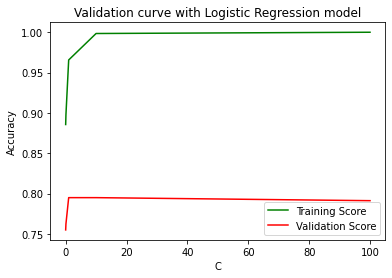

In [33]:
plt.plot(alpha,train_acc, label='Training Score', color='g')
plt.plot(alpha,val_acc, label='Validation Score', color='r')

plt.title('Validation curve with Logistic Regression model')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [34]:
model2=linear_model.LogisticRegression(C=10)
model2.fit(X_train_clean,y_train) 

LogisticRegression(C=10)

In [35]:
y_pred=model2.predict(X_test_clean)

In [36]:
print(accuracy_score(y_test,y_pred))

0.845


In [37]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print("Confusion matrix:\n",cm)

Confusion matrix:
 [[82 18]
 [13 87]]


In [38]:
from sklearn.metrics import classification_report
target=['positive','negative']
print(classification_report(y_test, y_pred, target_names=target))

              precision    recall  f1-score   support

    positive       0.86      0.82      0.84       100
    negative       0.83      0.87      0.85       100

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200



### Testing the model with sample reviews

In [43]:
text=['This is a no frills restaurant, fairly clean, good ambience, on the main road and easy to access. We had their lunch buffet which was quite adequate and good value for the money.']
text_vec=vectorizer.transform(text)
prediction= model2.predict(text_vec)
if prediction == 0:
  print('NEGATIVE')
else:
  print('POSITIVE')

POSITIVE


In [44]:
text2=['Poor quality service.We had to wait a good 30 minutes before someone noticed us and the restaurant was practically empty at that Time . The food was mediocre too.Never recommending this to anybody.']
text_vec=vectorizer.transform(text2)
prediction= model2.predict(text_vec)
if prediction == 0:
  print('NEGATIVE')
else:
  print('POSITIVE')

NEGATIVE
